Student name Ruslan Hasanov <br>
Student number 2310614 <br>
February, 05, 2024  <br>

# Exercise 2 | TKO_7092 Evaluation of Machine Learning Methods 2024

### Prediction of the metal ion content from multi-parameter data
<b> Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), using number of neighbors k = 1, 3, 5, 7.</b> <br>

<b> Instructions: </b> 

    - You may use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html
    - The data should be standarized using z-score (using sklearn.preprocessing.StandardScaler is advised).
    - Implement Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Explain your code by adding detailed comments. 
    - Only provide code that is relevant to the exercise.
    - Please submit your solution as a Jupyter Notebook (.ipynb) and as a PDF file. Ensure to include your full name in the filename.     
    - Submit to moodle your solution on ** Wednesday 7 of February ** at the latest.
  
<b>Please follow the instructions and note that you are expected to submit your individual solution.<br>
Identical or overly similar submissions will result in the exercise being marked as failed.
</b>

## Import libraries

In [1]:
# In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error

## Read and visualize the dataset

In [2]:
# In this cell read the file Water_data.csv
# Print the dataset dimesions (i.e. number of rows and columns)
# Print the first 5 rows of the dataset

# Reading the file
df = pd.read_csv(r'C:\Users\Comp-servis\Desktop\Evaluation of Machine Learning Methods\Exercise 2\water_data.csv')

# Geting the dimensions of the dataset
num_rows, num_columns = df.shape

# Printing the dimensions
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Printing the first 5 rows of the dataset
print(df.head(5))

Number of rows: 268
Number of columns: 6
    Mod1  Mod2    Mod3  c_total   Cd    Pb
0   9945   119   72335        0  0.0   0.0
1   9596   119  110542        0  0.0   0.0
2  10812   120   98594        0  0.0   0.0
3  10786   117   82977        0  0.0   0.0
4  10566   108  136416       14  0.0  14.0


## Standardization of the dataset

In [3]:
# In this cell, standardize the dataset features by removing the mean and scaling to unit variance. 
# In other words, use z-score to scale the dataset features (Mod1, Mod2, Mod3) 
# Print the 5 first samples (i.e. rows) of the scaled dataset

# Selecting the columns for Mod1, Mod2 and Mod3 to standardize
columns_to_standardize = ['Mod1', 'Mod2', 'Mod3']

# Creating a StandardScaler instance
scaler = StandardScaler()

# Standardizing the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Printing the first 5 rows of the scaled dataset
df.head(5)

,Mod1,Mod2,Mod3,c_total,Cd,Pb
0,-0.972283,-0.670482,-0.358179,0,0.0,0.0
1,-0.975878,-0.670482,0.259488,0,0.0,0.0
2,-0.963351,-0.670394,0.066333,0,0.0,0.0
3,-0.963619,-0.670657,-0.186137,0,0.0,0.0
4,-0.965885,-0.671447,0.677776,14,0.0,14.0


## C-index code 

In [4]:
# In this cell, implement the C-index function. You may use the implementation from the first exercise.
def cindex(y, yp):
    n = 0
    h_num = 0
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt):
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt):
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n

In [5]:
# Test the cindex function with following values
true_labels = np.array([-1, 1, 1, -1, 1])
predictions = np.array([0.60, 0.80, 0.75, 0.75, 0.70])
cindx = cindex(true_labels, predictions)
print(cindx) #For this example, a correct C-index implementation will result in 0.75

0.75


## Leave-One-Out cross-validation
In the following cell, write and execute your code for Leave-One-Out cross-validation using K-Nearest Neighbor Regression with k values of 1, 3, 5, and 7.<br>
Print the corresponding Leave-One-Out C-index for c_total, Cd and Pb for each k value.

In [6]:
# Extracting the features and target variables (y_c_total, y_Cd, y_Pb) from the DataFrame
X = df[['Mod1', 'Mod2', 'Mod3']].values  # Features
y_c_total = df['c_total'].values  # Target variable for c_total
y_Cd = df['Cd'].values  # Target variable for Cd
y_Pb = df['Pb'].values  # Target variable for Pb

print('C-index results for  Leave-One-Out method')

# Selecting the k values for K-Nearest Neighbors Regression
k_values = [1, 3, 5, 7]

# Creating lists to store C-index scores for each output
cindex_scores_c_total_loo = []
cindex_scores_Cd_loo = []
cindex_scores_Pb_loo = []

# Lists to store MAE values
mae_c_total_loo=[]
mae_Cd_loo=[]
mae_Pb_loo=[]

# Iterating over each k
for k in k_values:
    print(f"\nK-Nearest Neighbors Regression with k = {k}")

    # Initializing K-Nearest Neighbors Regressor
    knn = KNeighborsRegressor(n_neighbors=k)

    # Initializing Leave-One-Out cross-validator
    loo = LeaveOneOut()
    
    # Creating lists to store predictions
    predictions_c_total = []
    predictions_Cd = []
    predictions_Pb = []

    # Perform Leave-One-Out cross-validation
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train_c_total, y_test_c_total = y_c_total[train_index], y_c_total[test_index]
        y_train_Cd, y_test_Cd = y_Cd[train_index], y_Cd[test_index]
        y_train_Pb, y_test_Pb = y_Pb[train_index], y_Pb[test_index]

        # Fit the model
        knn.fit(X_train, y_train_c_total)
        
        # Make predictions
        y_pred_c_total = knn.predict(X_test)
        
        predictions_c_total.append(y_pred_c_total[0])

        # Repeat the process for Cd and Pb (replace with your actual variables)
        
        # Fit the model
        knn.fit(X_train, y_train_Cd)
        
        # Make predictions
        y_pred_Cd = knn.predict(X_test)
        
        predictions_Cd.append(y_pred_Cd[0])
        
        # Fit the model
        knn.fit(X_train, y_train_Pb)
        
        # Make predictions
        y_pred_Pb = knn.predict(X_test)
        
        predictions_Pb.append(y_pred_Pb[0])

    # Storing resultant C-index values for each output variable
    cindex_scores_c_total_loo.append(cindex(y_c_total, predictions_c_total))
    cindex_scores_Cd_loo.append(cindex(y_Cd, predictions_Cd))
    cindex_scores_Pb_loo.append(cindex(y_Pb, predictions_Pb))
        
    # Appending MAE values to the corresponding lists
    mae_c_total_loo.append(mean_absolute_error(y_c_total, predictions_c_total))
    mae_Cd_loo.append(mean_absolute_error(y_Cd, predictions_Cd))
    mae_Pb_loo.append(mean_absolute_error(y_Pb, predictions_Pb))
    
    # Printing the results for c_total, Cd, and Pb
    print(f"C-index for c_total: {cindex(y_c_total, predictions_c_total):.3f}")
    print(f"C-index for Cd: {cindex(y_Cd, predictions_Cd):.3f}")
    print(f"C-index for Pb: {cindex(y_Pb, predictions_Pb):.3f}")

C-index results for  Leave-One-Out method

K-Nearest Neighbors Regression with k = 1
C-index for c_total: 0.908
C-index for Cd: 0.914
C-index for Pb: 0.880

K-Nearest Neighbors Regression with k = 3
C-index for c_total: 0.920
C-index for Cd: 0.912
C-index for Pb: 0.885

K-Nearest Neighbors Regression with k = 5
C-index for c_total: 0.896
C-index for Cd: 0.866
C-index for Pb: 0.861

K-Nearest Neighbors Regression with k = 7
C-index for c_total: 0.884
C-index for Cd: 0.832
C-index for Pb: 0.841


## Leave-Replicas-Out cross-validation

In the following cell, write and execute your code for Leave-Replicas-Out cross-validation using K-Nearest Neighbor Regression with k values of 1, 3, 5, and 7.<br>
Print the corresponding Leave-Replicas-Out C-index for c_total, Cd and Pb for each k value.

In [7]:
# Extracting all the target variables
y = df.iloc[:, 3:].values

# Identifying unique instances
unique_instances = np.unique(y, axis = 0)

# Lists to store C-index scores for each output
cindex_scores_c_total_lro  = []
cindex_scores_Cd_lro = []
cindex_scores_Pb_lro = []

print('C-index results for Leave-Replicas-Out method')

# Lists to store MAE values
mae_c_total_lro=[]
mae_Cd_lro=[]
mae_Pb_lro=[]


# Iterating over each k
for k in k_values:
    print(f"\nK-Nearest Neighbors Regression with k = {k}")

    # Lists to store predictions for the c_total, Cd and Pb variable
    predictions_c_total = []
    predictions_Cd = []
    predictions_Pb = []

    # Lists to store the true labels for the c_total, Cd and Pb variables ordered by replica groups
    c_total_y_ordered = []
    Cd_y_ordered = []
    Pb_y_ordered = []

    # Initializing K-Nearest Neighbors Regressor
    knn_model = KNeighborsRegressor(n_neighbors = k)

    # Iterating over unique instances
    for instance in unique_instances:

        # Finding indices of replicates for the current instance
        replicate_indices = np.where(np.all(y == instance, axis = 1))[0]

        # Creating a training features set with excluding the current replicate group
        X_train = np.delete(X, replicate_indices, axis = 0)

        # Creating a training target variable set excluding the current replicate group
        y_train = np.delete(y, replicate_indices, axis = 0)

        # Training the model
        knn_model.fit(X_train, y_train)

        # A test set to contain the replicate group
        X_replicate = X[replicate_indices]

        # A set of the true labels corresponding to the given group of replicates
        y_replicate = y[replicate_indices]

        # Genrating predictions on the test set
        y_pred = knn_model.predict(X_replicate)

        # Appending the predictions to the list for the corresponding variable
        predictions_c_total.append(y_pred[:, 0])
        predictions_Cd.append(y_pred[:, 1])
        predictions_Pb.append(y_pred[:, 2])

        # Appending the true labels for the given group of replicates to the list that stores the true labels for corresponding variable ordered by replica groups
        c_total_y_ordered.append(y_replicate[:, 0])
        Cd_y_ordered.append(y_replicate[:, 1])
        Pb_y_ordered.append(y_replicate[:, 2])

    # Concatenating the list for the corresponding variable to get predictions for all data points
    predictions_c_total = np.concatenate(predictions_c_total)
    predictions_Cd = np.concatenate(predictions_Cd)
    predictions_Pb = np.concatenate(predictions_Pb)
    
    # Concatenating the list of true labels for the corresponding variable ordered by replicas groups to get the true labels for all data points
    c_total_y_ordered = np.concatenate(c_total_y_ordered)
    Cd_y_ordered = np.concatenate(Cd_y_ordered)
    Pb_y_ordered = np.concatenate(Pb_y_ordered)

    # Calculating the c-index for the corresponding variable
    cindex_c_total = cindex(c_total_y_ordered, predictions_c_total)
    cindex_Cd = cindex(Cd_y_ordered, predictions_Cd)
    cindex_Pb = cindex(Pb_y_ordered, predictions_Pb)

    # Appending c-index values to the list of c-index values for the corresponding variable
    cindex_scores_c_total_lro.append(cindex_c_total)
    cindex_scores_Cd_lro.append(cindex_Cd)
    cindex_scores_Pb_lro.append(cindex_Pb)
    
    # Appending MAE values to the corresponding lists 
    mae_c_total_lro.append(mean_absolute_error(y[:, 0], predictions_c_total))
    mae_Cd_lro.append(mean_absolute_error(y[:, 1], predictions_Cd))
    mae_Pb_lro.append(mean_absolute_error(y[:, 2], predictions_Pb))
    
    # Printing the results for c_total, Cd, and Pb
    print(f"C-index for c_total: {cindex_c_total:.3f}")
    print(f"C-index for Cd: {cindex_Cd:.3f}")
    print(f"C-index for Pb: {cindex_Cd:.3f}")

C-index results for Leave-Replicas-Out method

K-Nearest Neighbors Regression with k = 1
C-index for c_total: 0.824
C-index for Cd: 0.753
C-index for Pb: 0.753

K-Nearest Neighbors Regression with k = 3
C-index for c_total: 0.823
C-index for Cd: 0.754
C-index for Pb: 0.754

K-Nearest Neighbors Regression with k = 5
C-index for c_total: 0.816
C-index for Cd: 0.733
C-index for Pb: 0.733

K-Nearest Neighbors Regression with k = 7
C-index for c_total: 0.820
C-index for Cd: 0.742
C-index for Pb: 0.742


## Plot Leave-One-Out and Leave-Replicas-Out Results

Note: You may plot the results as they were presented in the video lecture (refer to MOOC2-Module 2 .pptx slides).

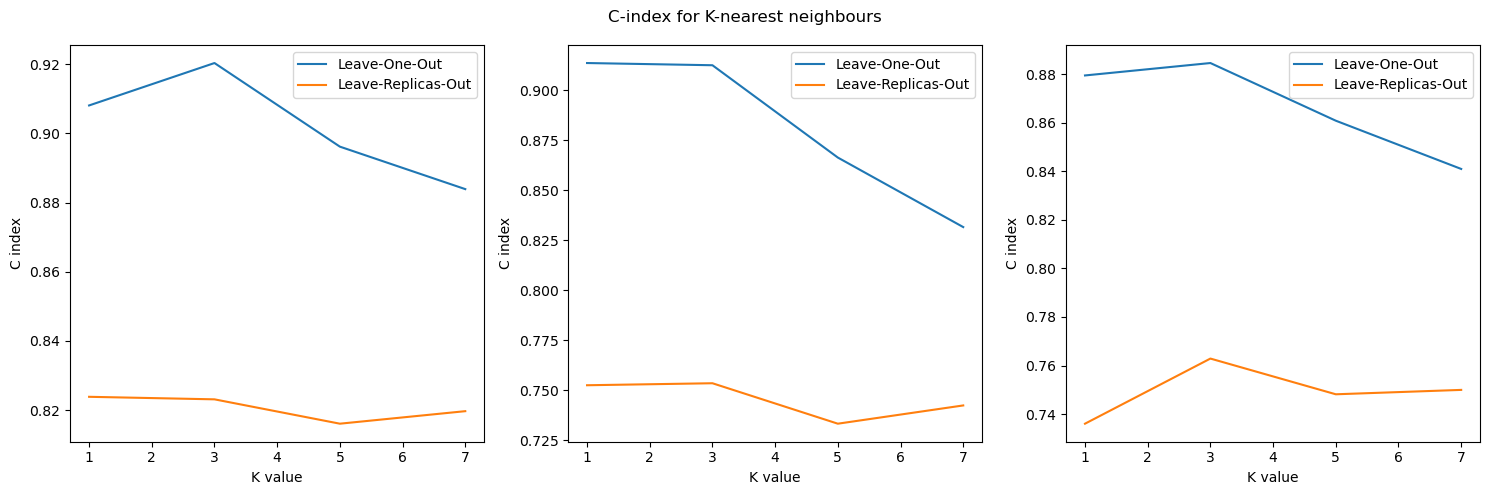

In [8]:
# Creating subplots
plt.figure(figsize=(15, 5))

# Subplot 1
plt.subplot(1, 3, 1) # row 1, 3 columns and supblot 1
plt.plot(k_values, cindex_scores_c_total_loo, label='Leave-One-Out') # Plotting the results for Leave-One-Out Cross Validation
plt.plot(k_values, cindex_scores_c_total_lro, label='Leave-Replicas-Out') # Plotting the results for Leave-Replicas-Out Cross Validation
plt.legend() # Displaying the legend

plt.xlabel('K value') # Adding x axis title 
plt.ylabel('C index') # Adding y axis title

# Subplot 2
plt.subplot(1, 3, 2) # row 1, 3 columns and supblot 2
plt.plot(k_values, cindex_scores_Cd_loo, label='Leave-One-Out') # Plotting the results for Leave-One-Out Cross Validation
plt.plot(k_values, cindex_scores_Cd_lro, label='Leave-Replicas-Out') # Plotting the results for Leave-Replicas-Out Cross Validation
plt.legend() # Displaying the legend

plt.xlabel('K value') # Adding x axis title 
plt.ylabel('C index') # Adding y axis title

# Subplot 3
plt.subplot(1, 3, 3) # row 1, 3 columns and supblot 3
plt.plot(k_values, cindex_scores_Pb_loo, label='Leave-One-Out') # Plotting the results for Leave-One-Out Cross Validation
plt.plot(k_values, cindex_scores_Pb_lro, label='Leave-Replicas-Out') # Plotting the results for Leave-Replicas-Out Cross Validation
plt.legend() # Displaying the legend

plt.xlabel('K value') # Adding x axis title 
plt.ylabel('C index') # Adding y axis title

plt.suptitle('C-index for K-nearest neighbours') # Adding title for whole figures

# Displaying the plot
plt.tight_layout()
plt.show()

## Interpretation of results
#### Answer the following questions based on the results obtained
- Which cross-validation method had more optimistic results? 
- Explain the reason for the optimistic results produced by the cross-validation method.
- Which cross-validation method generalized better on unseen data? Why?

#In this cell write your answers to the questions.

- In my opinion the Leave-One-Out cross-validation (LOOCV) method produced better results than the Leave-Replicas-Out (LROCV), since the c-index scores were much higher in Leave-One-Out Cross Validation method than Leave-Replicas-Out.

- Compared to LOOCV, LROCV method makes the use of fewer validation sets, since it groups instances based on their replicates, while each observation is used as a validation set once in LOOCV. LOOCV could also produce better results, since the model is trained on a larger portion of the data compared to LROCV. 


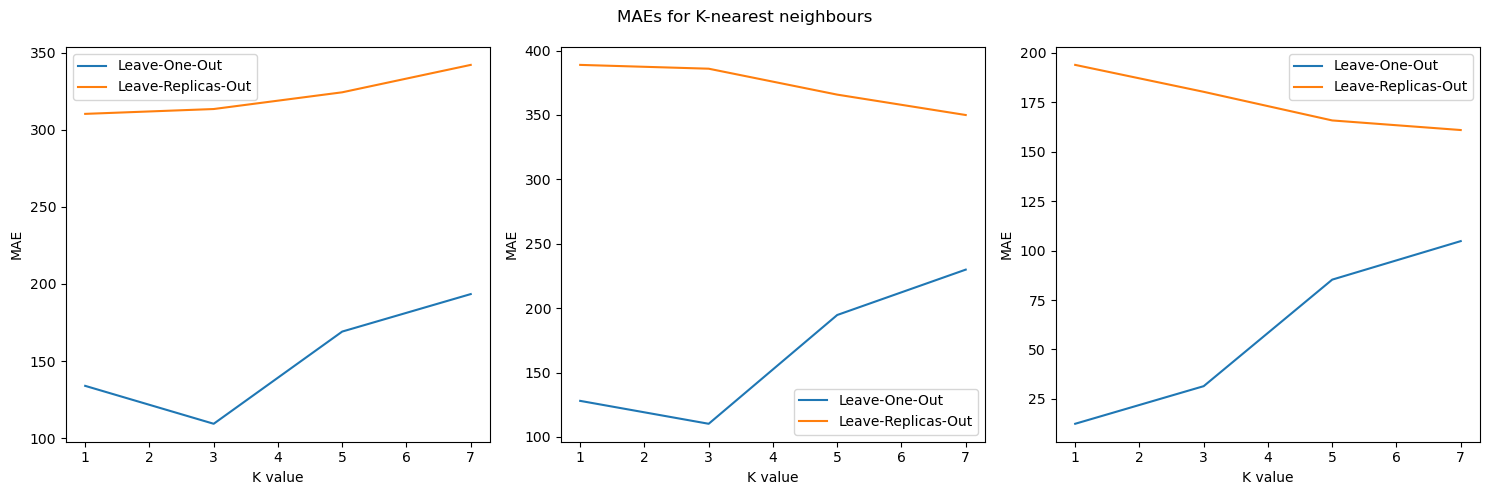

In [9]:
# Creating subplots
plt.figure(figsize=(15, 5))

# Subplot 1
plt.subplot(1, 3, 1) # row 1, 3 columns and supblot 1
plt.plot(k_values, mae_c_total_loo, label='Leave-One-Out') # Plotting the results for Leave-One-Out Cross Validation
plt.plot(k_values, mae_c_total_lro, label='Leave-Replicas-Out') # Plotting the results for Leave-Replicas-Out Cross Validation
plt.legend() # Displaying the legend

plt.xlabel('K value') # Adding x axis title 
plt.ylabel('MAE') # Adding y axis title

# Subplot 2
plt.subplot(1, 3, 2) # row 1, 3 columns and supblot 2
plt.plot(k_values, mae_Cd_loo, label='Leave-One-Out') # Plotting the results for Leave-One-Out Cross Validation
plt.plot(k_values, mae_Cd_lro, label='Leave-Replicas-Out') # Plotting the results for Leave-Replicas-Out Cross Validation
plt.legend() # Displaying the legend

plt.xlabel('K value') # Adding x axis title 
plt.ylabel('MAE') # Adding y axis title

# Subplot 3
plt.subplot(1, 3, 3) # row 1, 3 columns and supblot 3
plt.plot(k_values, mae_Pb_loo, label='Leave-One-Out') # Plotting the results for Leave-One-Out Cross Validation
plt.plot(k_values, mae_Pb_lro, label='Leave-Replicas-Out') # Plotting the results for Leave-Replicas-Out Cross Validation
plt.legend() # Displaying the legend

plt.xlabel('K value') # Adding x axis title 
plt.ylabel('MAE') # Adding y axis title

plt.suptitle('MAEs for K-nearest neighbours') # Adding title for whole figures

# Displaying the plot
plt.tight_layout()
plt.show()

- This can be answered by looking at the MAE values, from the graphs it can be seen that LOOCV produce better results than LROCV method. This could be due to the fact that LOOCV takes advantage of the more portion of the data for training than LOOCV.